# In this project we have to predict CTC of employees based on the given different informationof the employee. 

## First let's Import the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Now load the data
df = pd.read_csv('C:/Users/laxpa/OneDrive/Desktop/ML case Study.csv',header=0)
colleges = pd.read_csv('C:/Users/laxpa/OneDrive/Desktop/Colleges.csv',header=0 )
cities = pd.read_csv('C:/Users/laxpa/OneDrive/Desktop/cities.csv', header=0)


# Inspecting the data


In [3]:
df.head()


,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df.shape

(1589, 8)

In [5]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [7]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [8]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# Data Preprocessing
### Listing colleges as Tier-1 , Tier- 2 , Tier-3

In [9]:
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()

In [10]:
Tier1, Tier2, Tier3

(['IIT Bombay',
  'IIT Delhi',
  'IIT Kharagpur',
  'IIT Madras',
  'IIT Kanpur',
  'IIT Roorkee',
  'IIT Guwahati',
  'IIIT Hyderabad',
  'BITS Pilani (Pilani Campus)',
  'IIT Indore',
  'IIT Ropar',
  'IIT BHU (Varanasi)',
  'IIT ISM Dhanbad',
  'DTU',
  'NSUT Delhi (NSIT)',
  'NIT Tiruchipally (Trichy)',
  'NIT Warangal',
  'NIT Surathkal (Karnataka)',
  'Jadavpur University',
  'BITS Pilani (Hyderabad Campus)',
  'BITS Pilani (Goa Campus)',
  'IIIT Allahabad',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['IIIT Bangalore',
  'IIIT Delhi',
  'IGDTUW',
  'NIT Calicut',
  'IIITM Gwalior',
  'IIIT Lucknow',
  'MNNIT Allahabad',
  'Punjab Engineering College',
  'DAIICT',
  'MNIT Jaipur',
  'NIT Durgapur',
  'VNIT Nagpur',
  'LNMIIT',
  'BIT Mesra',
  'SVNIT Surat',
  'NIT Jalandhar',
  'NIT Jamshedpur',
  'NIT Kurukshetra',
  'NIT Patna',
  'NIT Raipur',
  'NIT Bhopal',
  'NIT Rourkela',
  'NIT Silchar',
  'NIT Sikkim',
  'IIIT Jabalpur',
  'Jalpaiguri Government Engineering College',
 

In [11]:
# Now the college that belongs to tier 1 puts the 1 instead of the college's name same goes for both tier 2 and tier 3.
# By using the for loop because we have three conditions and loops work great in conditional statements.

for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace = True)

C:\Users\laxpa\AppData\Local\Temp\ipykernel_17824\421130066.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["College"].replace(item,2,inplace = True)
C:\Users\laxpa\AppData\Local\Temp\ipykernel_17824\421130066.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [12]:
df
# Now we have 3 differnent types of colleges 1,2 and 3.

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,1,Surat,Executive,61285.0,3,44,60,77283.59
1585,1,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,1,Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,1,Durgapur,Executive,52054.0,2,67,29,73394.09


# Creating dummy variables for colleges as we have 3 inputs of it. 

In [13]:
df = pd.get_dummies(df, columns=['College'], dtype= int, drop_first=True)

In [14]:
# Checking for the null values
df.isnull().sum()

City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
College_2              0
College_3              0
dtype: int64

In [15]:
df

,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_2,College_3
0,Asansol,Manager,55523.0,3,66,19,71406.58,1,0
1,Ajmer,Executive,57081.0,1,84,18,68005.87,1,0
2,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,0,1
3,Ajmer,Executive,49010.0,2,81,33,82092.39,0,1
4,Durgapur,Executive,57879.0,4,74,32,73878.10,0,0
...,...,...,...,...,...,...,...,...,...
1584,Surat,Executive,61285.0,3,44,60,77283.59,0,0
1585,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,0,0
1586,Ahmedabad,Executive,44907.0,1,60,19,70186.19,0,0
1587,Durgapur,Executive,52054.0,2,67,29,73394.09,0,0


### Listing Cities as Metro and Non-metro

In [16]:
metro = cities["Metrio City"].tolist()
non_metro = cities["non-metro cities"].tolist()

In [17]:
for city in df.City:
    if city in metro:
        df["City"].replace(city,1,inplace = True)
    elif city in non_metro:
        df["City"].replace(city,0,inplace = True)

C:\Users\laxpa\AppData\Local\Temp\ipykernel_17824\4238310509.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["City"].replace(city,0,inplace = True)
C:\Users\laxpa\AppData\Local\Temp\ipykernel_17824\4238310509.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [18]:
# Cheking if the city has changed or not
df.head(10)

,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_2,College_3
0,0,Manager,55523.0,3,66,19,71406.58,1,0
1,0,Executive,57081.0,1,84,18,68005.87,1,0
2,0,Executive,60347.0,2,52,28,76764.02,0,1
3,0,Executive,49010.0,2,81,33,82092.39,0,1
4,0,Executive,57879.0,4,74,32,73878.10,0,0
5,0,Executive,54340.0,4,73,31,59950.89,1,0
6,1,Executive,60298.0,1,42,46,66602.34,0,1
7,1,Executive,49944.0,2,56,37,57768.44,1,0
8,1,Executive,53124.0,4,40,37,70083.30,0,1
9,0,Executive,51141.0,1,47,60,85648.48,0,0


In [19]:
df = pd.get_dummies(df, columns=['City'], dtype= int, drop_first=True)

In [20]:
df

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_2,College_3,City_1
0,Manager,55523.0,3,66,19,71406.58,1,0,0
1,Executive,57081.0,1,84,18,68005.87,1,0,0
2,Executive,60347.0,2,52,28,76764.02,0,1,0
3,Executive,49010.0,2,81,33,82092.39,0,1,0
4,Executive,57879.0,4,74,32,73878.10,0,0,0
...,...,...,...,...,...,...,...,...,...
1584,Executive,61285.0,3,44,60,77283.59,0,0,1
1585,Executive,63140.0,1,44,24,68416.86,0,0,0
1586,Executive,44907.0,1,60,19,70186.19,0,0,1
1587,Executive,52054.0,2,67,29,73394.09,0,0,0


In [21]:
df = pd.get_dummies(df, columns=['Role'], dtype= int, drop_first=True)

In [22]:
df

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_2,College_3,City_1,Role_Manager
0,55523.0,3,66,19,71406.58,1,0,0,1
1,57081.0,1,84,18,68005.87,1,0,0,0
2,60347.0,2,52,28,76764.02,0,1,0,0
3,49010.0,2,81,33,82092.39,0,1,0,0
4,57879.0,4,74,32,73878.10,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1584,61285.0,3,44,60,77283.59,0,0,1,0
1585,63140.0,1,44,24,68416.86,0,0,0,0
1586,44907.0,1,60,19,70186.19,0,0,1,0
1587,52054.0,2,67,29,73394.09,0,0,0,0


# Checking for the Missing Values

In [23]:
# We must check whether the data contains missing values after converting from categorical to quantitative data. Handling missing values
df.isnull().sum()

Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
College_2              0
College_3              0
City_1                 0
Role_Manager           0
dtype: int64

In [24]:
df.info()
# There is no missing values so no need to treat them with mean or meadian.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   College_2            1589 non-null   int32  
 6   College_3            1589 non-null   int32  
 7   City_1               1589 non-null   int32  
 8   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(4), int64(3)
memory usage: 87.0 KB


# Calculate the correlation matrix


In [25]:
import matplotlib.pyplot as plt

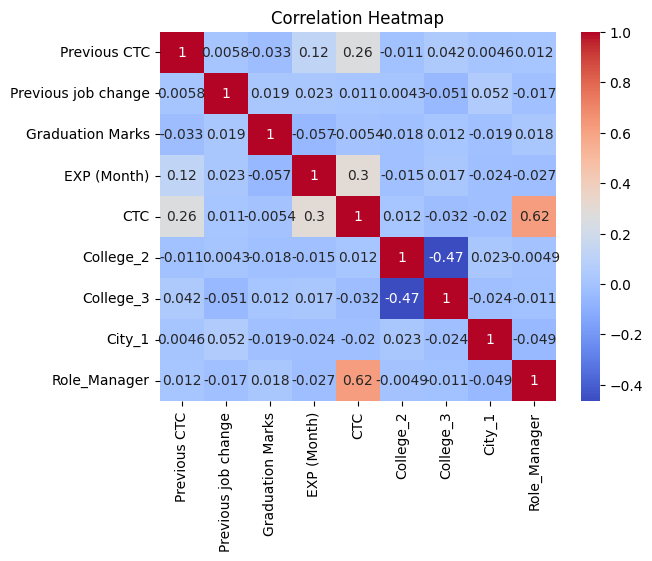

In [26]:
# Let's run the correlation matrix to see the relationship between the variables or to check the multicollinearity between the variables
corr = df.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


# Outliers detection and Treatment

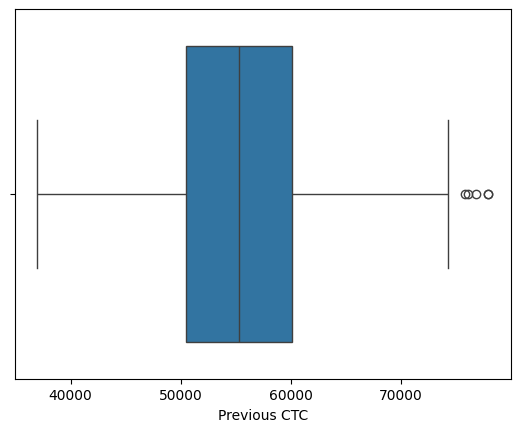

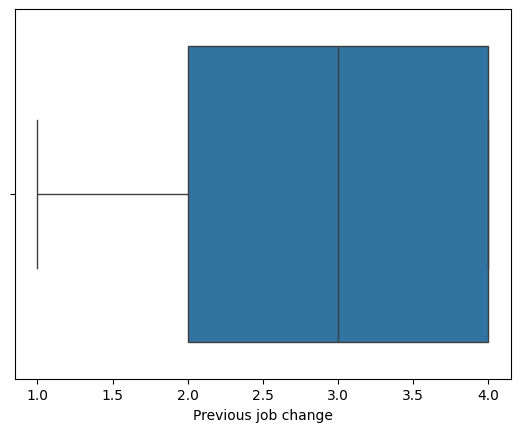

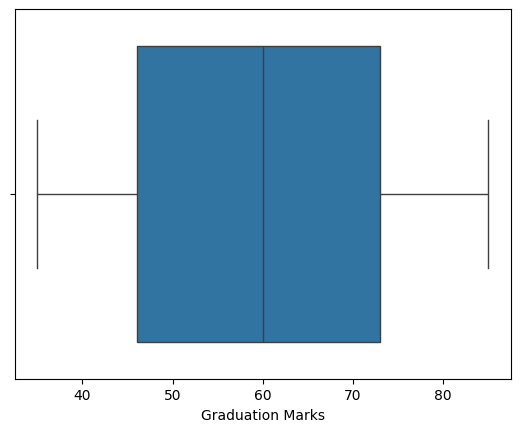

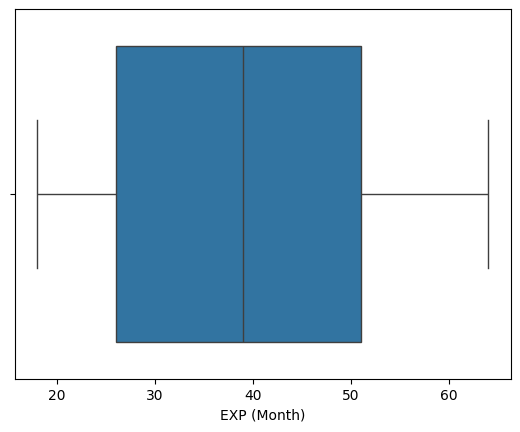

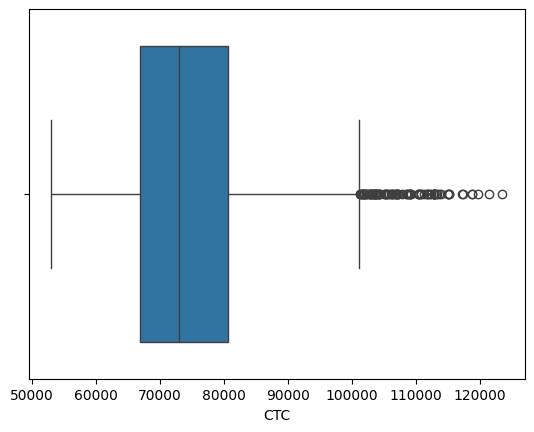

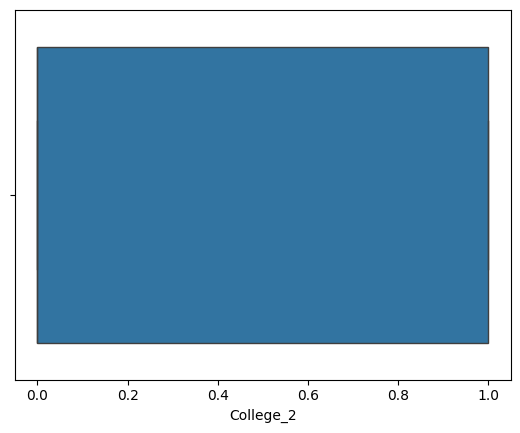

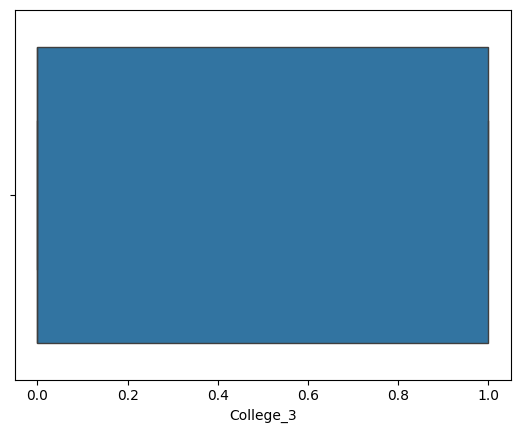

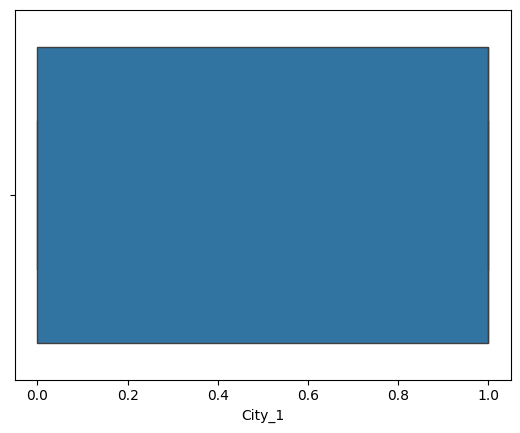

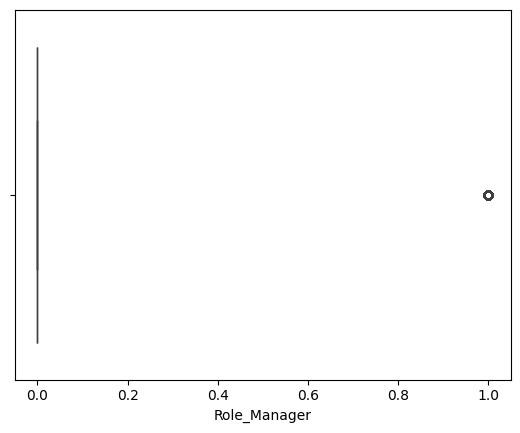

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
            sns.boxplot(data=df, x=i)
            plt.show()

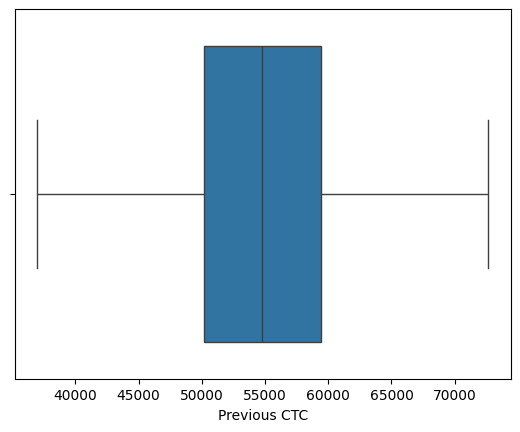

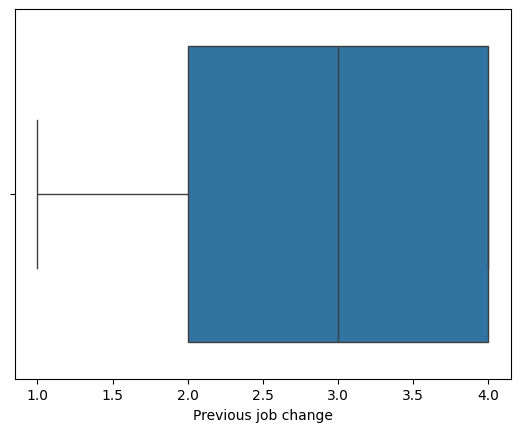

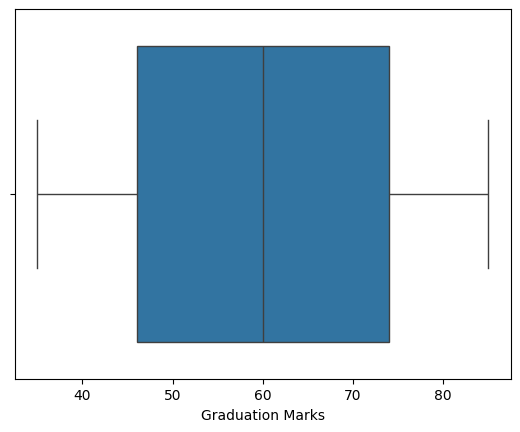

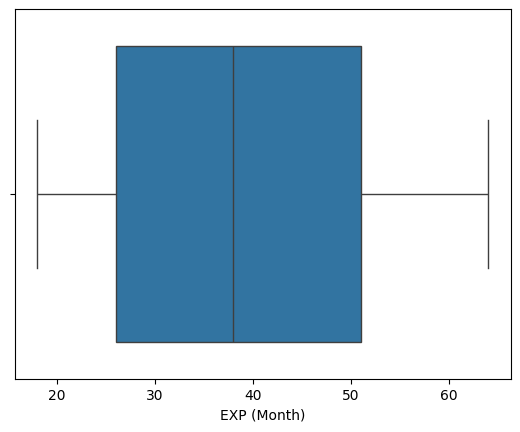

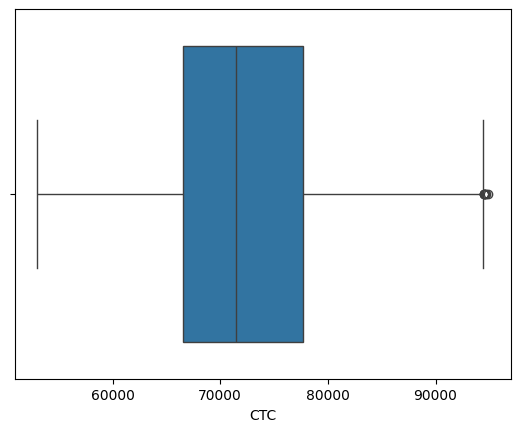

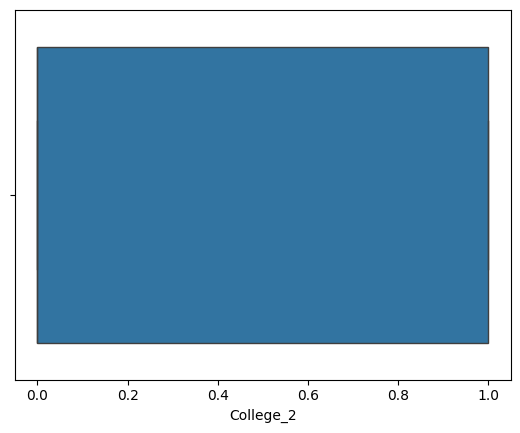

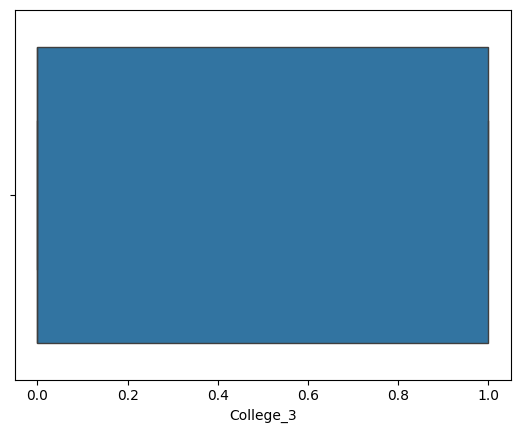

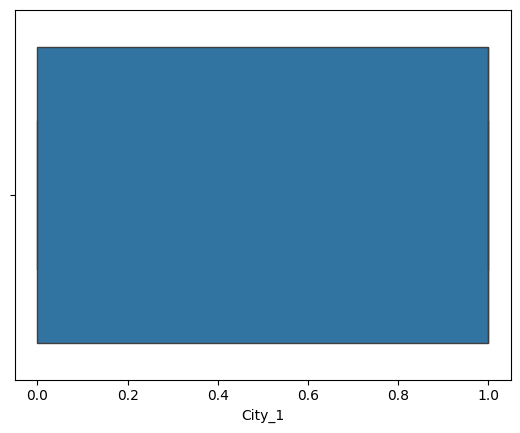

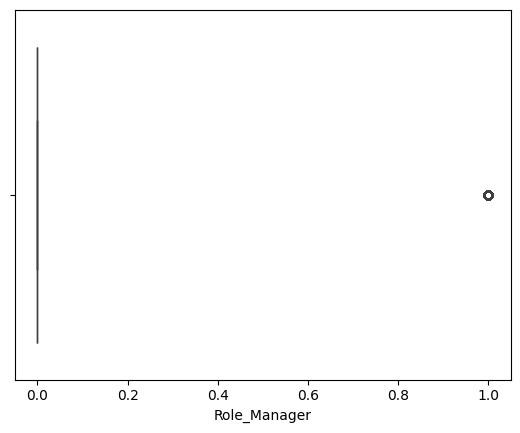

In [153]:

# Handle outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Didn't remove all outliers because by removing all of them, most of the data is getting lost by which variance and bias are increasing leading to poor 
# performance of the model. I've tried a lot to treat them all but didn't get better results.

df = remove_outliers(df, 'Previous CTC')
df = remove_outliers(df, 'CTC')


for i in df.select_dtypes(include="number").columns:
            sns.boxplot(data=df, x=i)
            plt.show()

# Checking the realtionship between two variables by using joint plot. 

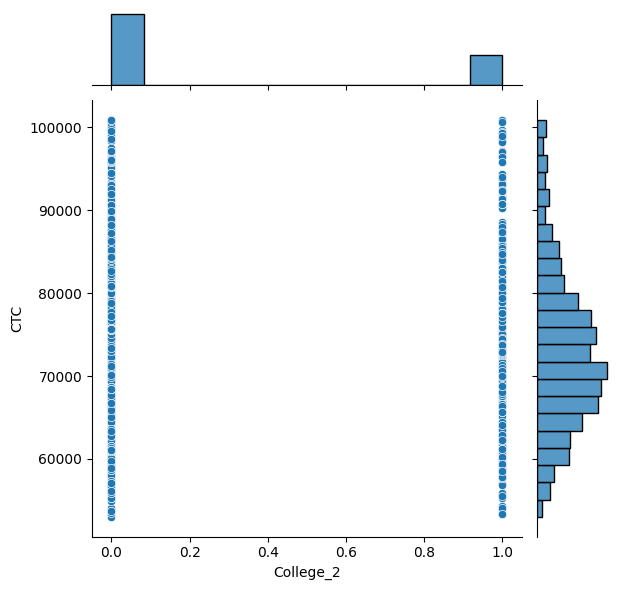

In [29]:
sns.jointplot(x="College_2", y="CTC",data=df)

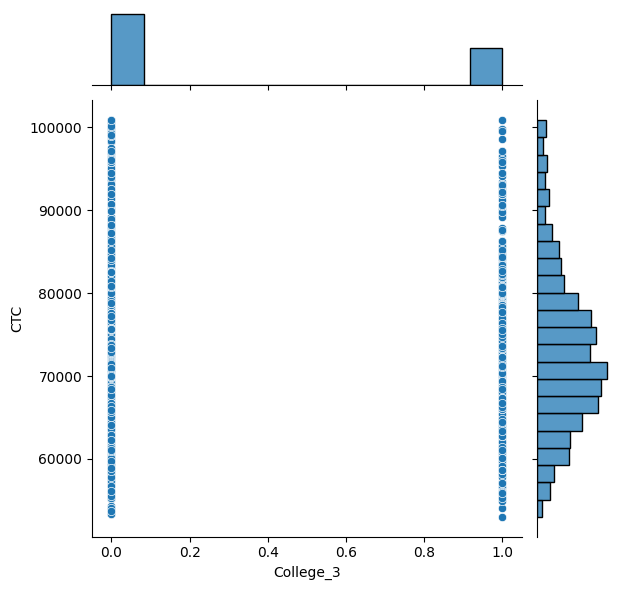

In [30]:
sns.jointplot(x="College_3", y="CTC",data=df)

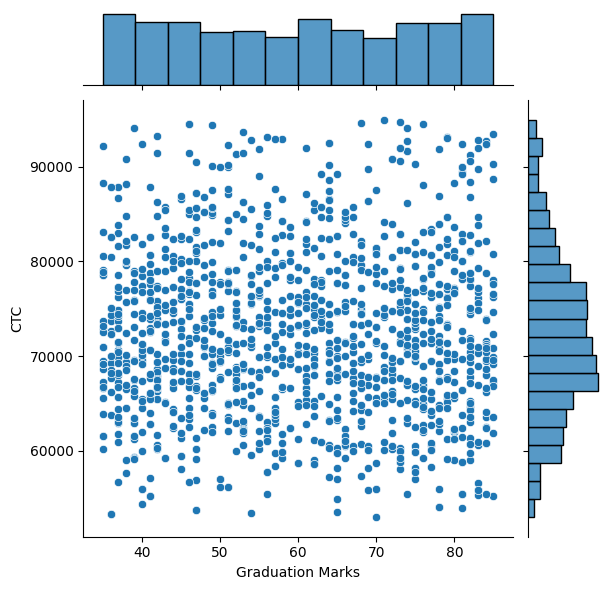

In [154]:
sns.jointplot(x = "Graduation Marks",y = "CTC",data = df)

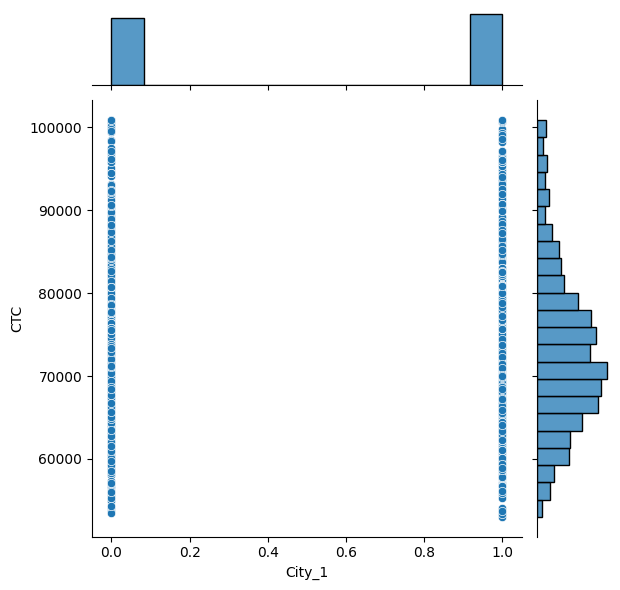

In [33]:
sns.jointplot(x = "City_1",y = "CTC",data = df)

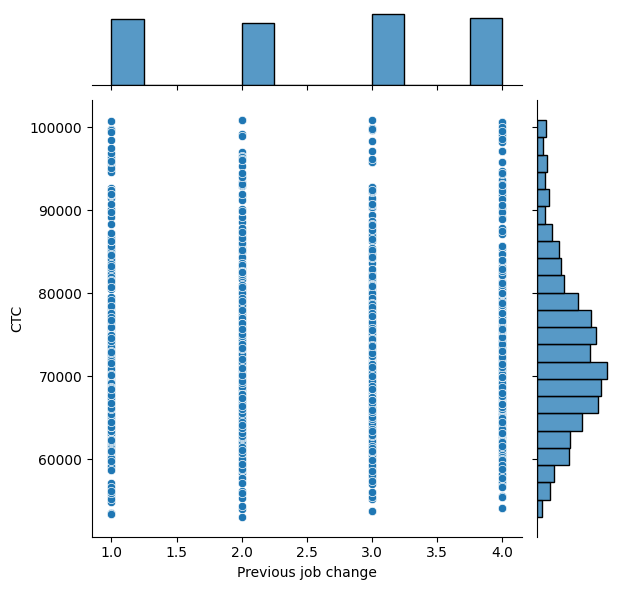

In [34]:
sns.jointplot(x = "Previous job change",y = "CTC",data = df)

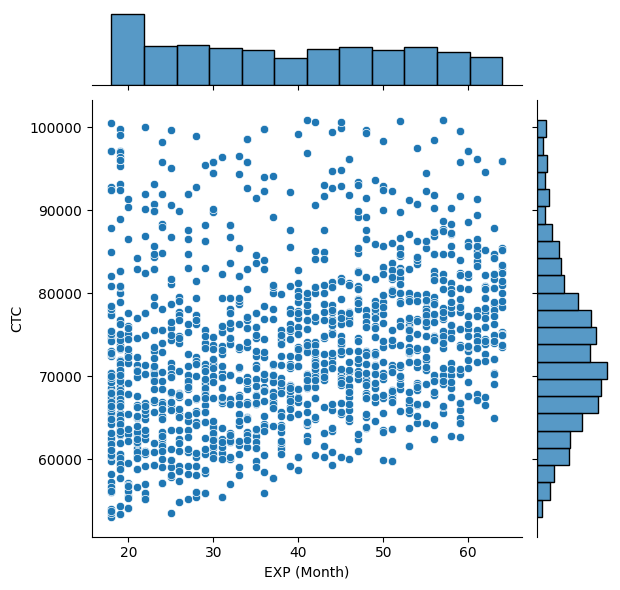

In [35]:
sns.jointplot(x = "EXP (Month)",y = "CTC",data = df)

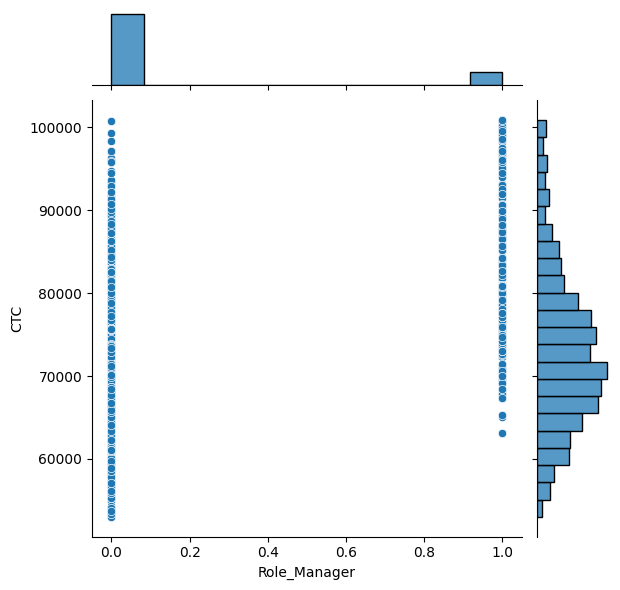

In [36]:
sns.jointplot(x = "Role_Manager",y = "CTC",data = df)

# <b> Performing the testing and trainig the data with different models

## <b> Model 1 : Muliple Linear Regression 

In [37]:
### As we have converted our data into continuous so we will perform regression models in it.

In [38]:
import statsmodels.api as sn

In [39]:
# Feature selection and scaling
X_multi = df.drop('CTC', axis=1)
y_multi = df['CTC']

In [40]:
X_multi_cons = sn.add_constant(X_multi)

In [41]:
X_multi

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_2,College_3,City_1,Role_Manager
0,55523.0,3,66,19,1,0,0,1
1,57081.0,1,84,18,1,0,0,0
2,60347.0,2,52,28,0,1,0,0
3,49010.0,2,81,33,0,1,0,0
4,57879.0,4,74,32,0,0,0,0
...,...,...,...,...,...,...,...,...
1584,61285.0,3,44,60,0,0,1,0
1585,63140.0,1,44,24,0,0,0,0
1586,44907.0,1,60,19,0,0,1,0
1587,52054.0,2,67,29,0,0,0,0


In [42]:
X_multi.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_2,College_3,City_1,Role_Manager
0,55523.0,3,66,19,1,0,0,1
1,57081.0,1,84,18,1,0,0,0
2,60347.0,2,52,28,0,1,0,0
3,49010.0,2,81,33,0,1,0,0
4,57879.0,4,74,32,0,0,0,0


In [43]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [44]:
# now fitting the model
lm_multi  = sn.OLS(y_multi, X_multi_cons).fit()

In [45]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     113.7
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          3.74e-148
Time:                        17:21:50   Log-Likelihood:                -15442.
No. Observations:                1490   AIC:                         3.090e+04
Df Residuals:                    1481   BIC:                         3.095e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.665e+04   2027.923     23.002      0.000    4.27e+04    5.06e+04
Previous CTC            0.2753      0.031      8.884      0.000       0.215       0.336
Previous job change    63.0710    178.866      0.353      0.724    -287.786     413.928
Graduation Marks        4.5351     13.343      0.340      0.734     -21.637      30.707
EXP (Month)           231.6538     14.360     16.132      0.000     203.485     259.822
College_2              20.7393    494.550      0.042      0.967    -949.354     990.833
College_3            -558.2332    476.343     -1.172      0.241   -1492.613     376.146
City_1                 65.0106    400.249      0.162      0.871    -720.106     850.127
Role_Manager         1.411e+04    552.278     25.552      0.000     1.3e+04    1.52e+04
==============================================================================
Omnibus:                       50.238   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.496
Skew:                           0.459   Prob(JB):                     1.47e-12
Kurtosis:                       3.190   Cond. No.                     5.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# performing linear regression
lm3 = LinearRegression()

In [48]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [49]:
print(lm3.intercept_, lm3.coef_)

# We can see the coefficient suggesting a positive effect of the predictor on the dependent variable.
# And 4.10549221e-01 showing the positive effect of the corresponding predictor.

46645.49006535379 [ 2.75325606e-01  6.30709690e+01  4.53505782e+00  2.31653789e+02
  2.07393334e+01 -5.58233226e+02  6.50106203e+01  1.41119097e+04]


# Test-Train Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi,test_size=0.2,random_state=0)

In [52]:
X_train.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_2,College_3,City_1,Role_Manager
825,54415.0,3,75,64,0,1,1,0
453,52310.0,4,47,20,1,0,1,0
1528,61138.0,3,68,61,0,1,1,0
723,58401.0,4,48,19,0,0,1,0
1361,53422.0,4,44,34,0,1,1,1


In [53]:
X_train.shape

(1192, 8)

In [54]:
X_test.shape

(298, 8)

# Traing Regression Tree

In [55]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 5)

In [56]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

## Predict values using trained model

In [57]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [58]:
y_test_pred

array([ 77719.53534483,  73888.51927966,  81145.83666667,  81773.9675    ,
        76940.41875   ,  73888.51927966,  67367.78659574,  67367.78659574,
        96730.47785714,  84685.656     ,  70674.07977444,  98206.294     ,
        81773.9675    ,  70674.07977444,  98206.294     ,  73888.51927966,
        73888.51927966,  67485.34818182,  67367.78659574,  81773.9675    ,
        65876.11321429,  77719.53534483,  73888.51927966,  74291.05525   ,
        73888.51927966,  67367.78659574,  74286.69892308,  67367.78659574,
        93804.79333333,  73888.51927966,  74286.69892308,  73888.51927966,
        67367.78659574,  71369.11272727,  77719.53534483,  72111.20133333,
        73888.51927966,  80316.47564103,  73888.51927966,  74291.05525   ,
        67485.34818182,  73888.51927966,  73888.51927966,  71614.49      ,
        67367.78659574,  67367.78659574,  67367.78659574,  90930.56      ,
        67367.78659574,  73888.51927966,  67367.78659574,  73888.51927966,
        73888.51927966,  

### Model Performance

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
mean_squared_error(y_test, y_test_pred)

59648719.9923036

In [61]:
r2_score(y_train, y_train_pred)

0.4887728754778118

In [62]:
r2_score(y_test, y_test_pred)

0.4191228622536849

### <b> Model 2 : Decision Tree Regressor 

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.loc[:,df.columns!="CTC"]

In [65]:
y = df["CTC"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

#### We have to split the Train: Test data in 80:20 ratio
##### 80:20 split means that 80% of the data is used for training the model, and 20% is reserved for testing its performance

In [67]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1192, 8) (298, 8) (1192,) (298,)


In [68]:
from sklearn import tree
from IPython.display import Image

In [69]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [70]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [71]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [72]:
mse_dt = mean_squared_error(y_test, y_test_pred)
r2_dt = r2_score(y_test, y_test_pred)

In [73]:
print("Mean Squared Error - ",mse_dt)

Mean Squared Error -  54459027.68975733


In [74]:
print("R squared value- ",r2_dt)

R squared value-  0.4696616434861426


In [75]:
import pydotplus

In [76]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled = True)

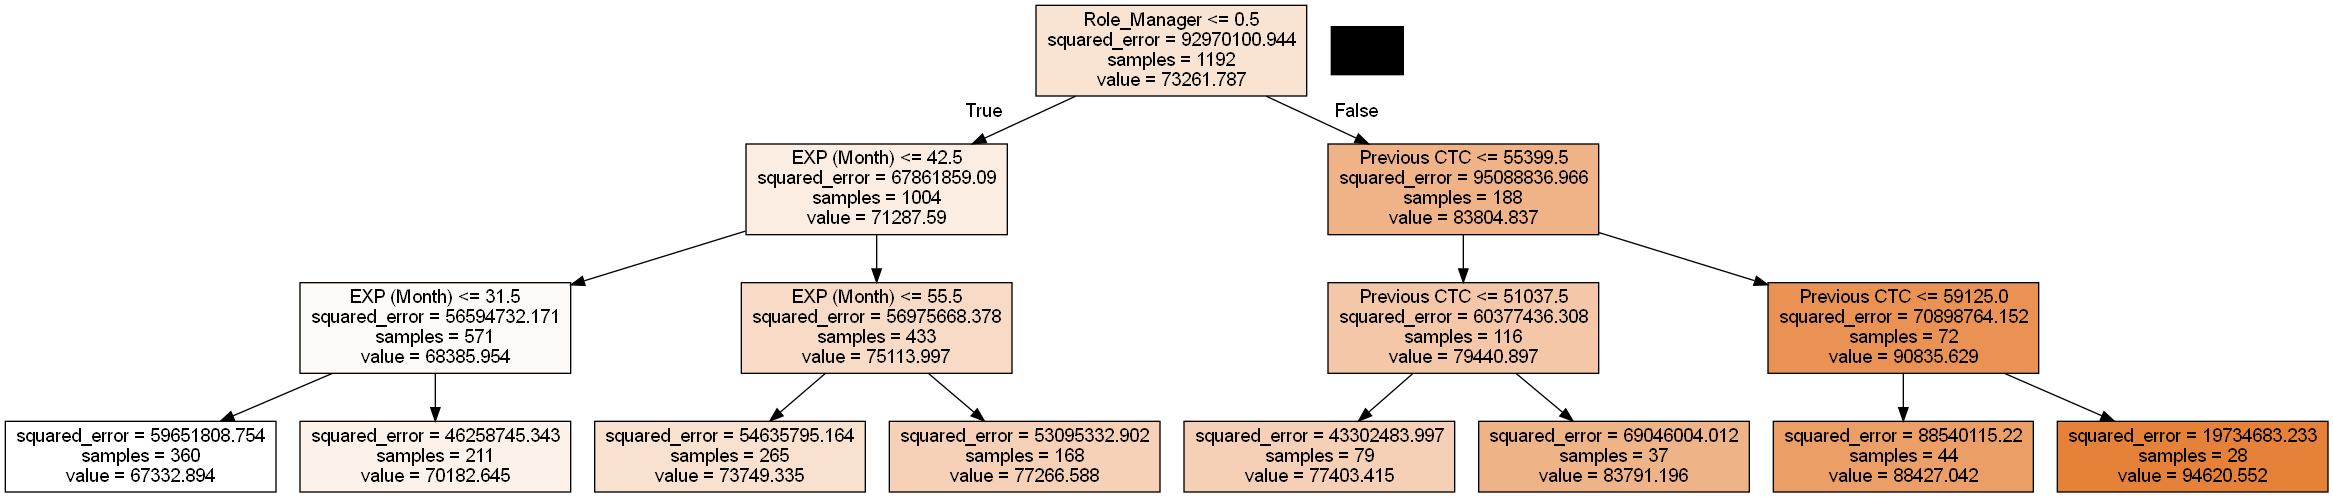

In [77]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### <b> Model 3 : Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf = RandomForestRegressor(n_estimators=250, random_state=42)  

In [80]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [81]:
pred_rf = rf.predict(X_test)

In [82]:
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

In [83]:
print("Mean Squared Error - ",mse_rf)

Mean Squared Error -  49397999.96598042


In [84]:
print("R squared value  - ",r2_rf)

R squared value  -  0.5189474504342483


### <b> Model 4 :Gradient Boosting Machines Regressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [87]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=42)

In [88]:
pred_gb = model.predict(X_test)

In [89]:
mse_gb = mean_squared_error(y_test, pred_gb)
r2_gb = r2_score(y_test,pred_gb)

In [90]:
print("Mean Squared Error - ",mse_gb)

Mean Squared Error -  52179687.84926747


In [91]:
print("R squared value - ",r2_gb)

R squared value -  0.491858538954574


### <b> Model 5 : XGBoost Regressor

In [92]:
from xgboost import XGBRegressor

In [93]:
m5 = XGBRegressor(n_estimators = 250, max_depth = 5, learning_rate = 0.1)

In [94]:
m5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [95]:
pred_xg = m5.predict(X_test)

In [96]:
mse_xg = mean_squared_error(y_test, pred_xg)
r2_xg = r2_score(y_test, pred_xg)

In [97]:
print("Mean Squared Error - ",mse_xg)

Mean Squared Error -  51243373.72402392


In [98]:
print(" R squared value",r2_xg)

 R squared value 0.5009766469235815


### <b> Model 6 : Ridge Regression

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
from sklearn.linear_model import Ridge

In [101]:
scaler = StandardScaler()

In [102]:
scaler.fit(X_train)

StandardScaler()

In [103]:
X_train_s = scaler.transform(X_train)

In [104]:
X_test_s = scaler.transform(X_test)

In [105]:
lm_rr = Ridge(alpha = 0.1)

In [106]:
lm_rr.fit(X_train_s,y_train)

Ridge(alpha=0.1)

In [107]:
y_pred = lm_rr.predict(X_test_s)

In [108]:
mse_rr = mean_squared_error(y_test, y_pred)
r2_rr = r2_score(y_test, y_pred)

In [109]:
print("Mean Squared Error - ",mse_rr)

Mean Squared Error -  57423983.624472596


In [110]:
print(" R squared value ",r2_rr)

 R squared value  0.44078801271714074


# Changing Hyper Parameters 

In [111]:
from sklearn.model_selection import validation_curve

In [112]:
param_range = np.logspace(-2,8,100)

In [113]:
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [114]:
train_mean = np.mean(train_scores, axis = 1)

In [115]:
test_mean = np.mean(test_scores, axis = 1)

In [116]:
max(test_mean)

0.3434298808238808

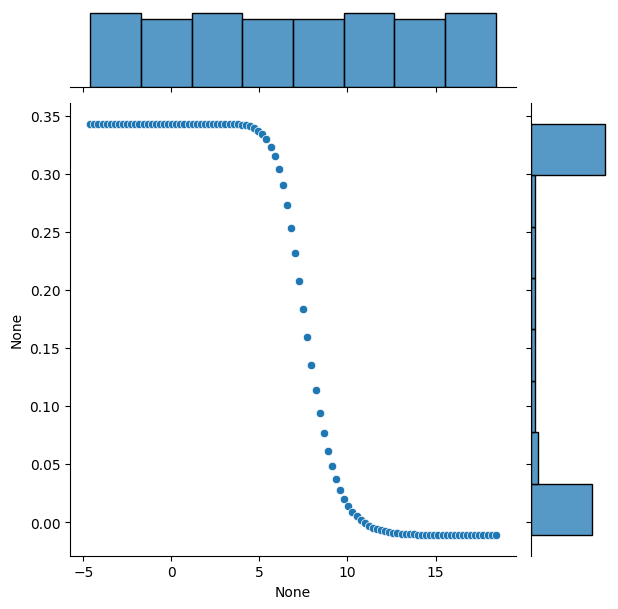

In [117]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [118]:
np.where(test_mean == max(test_mean))

(array([30], dtype=int64),)

In [119]:
param_range[30]

10.722672220103231

In [120]:
lm_r_best = Ridge(alpha = param_range[30])

In [121]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

In [122]:
y_pred_best = lm_r_best.predict(X_test_s)

In [123]:
print (y_pred_best)

[75101.70504217 71164.06609514 81333.40209046 70486.61449941
 66870.28849475 75747.2528596  66564.05111647 67758.20546181
 86008.27519271 83508.07137866 72105.61183948 82830.5063838
 70765.59597379 74250.45510803 85461.72887531 75364.63160146
 75402.21452947 71650.80569154 69622.284098   73285.82441518
 67289.45768226 75034.54154567 76749.54546487 77735.44706417
 74404.85997385 68511.61049378 75602.84690756 65741.60130691
 84244.88063382 75444.62721478 75948.57612446 74372.55835926
 65522.24556448 70124.43449797 74467.09247314 67669.06993729
 73315.23612873 77913.17809281 72506.46027894 80487.43518346
 70521.44384158 73166.82415423 72011.12412826 80706.45331318
 68481.7370041  68744.22812456 66130.12607213 86011.10448291
 68252.86677631 72478.02988361 68702.93493275 72528.02434281
 74075.15450615 82623.28882622 85049.54314348 71303.20987861
 79113.02549752 71294.99165846 69173.03296039 66114.70786998
 81973.90996635 69752.94438103 74240.07877436 72610.44908057
 69778.74708499 69762.864

In [124]:
mse_rr1 = mean_squared_error(y_test, y_pred_best)

In [125]:
r2_rr1 = r2_score(y_test,y_pred_best)

In [126]:
print (" mse is :",mse_rr1)

 mse is : 57561145.56354697


In [127]:
print (" The R squared vallue is :",r2_rr1)

 The R squared vallue is : 0.4394522885878127


### <b> Model 7 :  Lasso Regression

In [128]:
from sklearn.linear_model import Lasso

In [129]:
lm_lasso = Lasso(alpha = 0.5)

In [130]:
lm_lasso.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [131]:
y_pred_lasso = lm_lasso.predict(X_test_s)

In [132]:
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

In [133]:
print("Mean Squared Error - ",mse_lasso)

Mean Squared Error -  57423983.624472596


In [134]:
print(" R squared value - ",r2_lasso)

 R squared value -  0.44078801271714074


#### Changing Hyper Parameters

In [135]:
from sklearn.model_selection import validation_curve

In [136]:
param_range = np.logspace(-2,8,100)

In [137]:
train_scores, test_scores = validation_curve(
  Lasso(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [138]:
train_mean = np.mean(train_scores, axis = 1)

In [139]:
train_mean = np.mean(train_scores, axis = 1)

In [140]:
max(test_mean)

0.3434298808238808

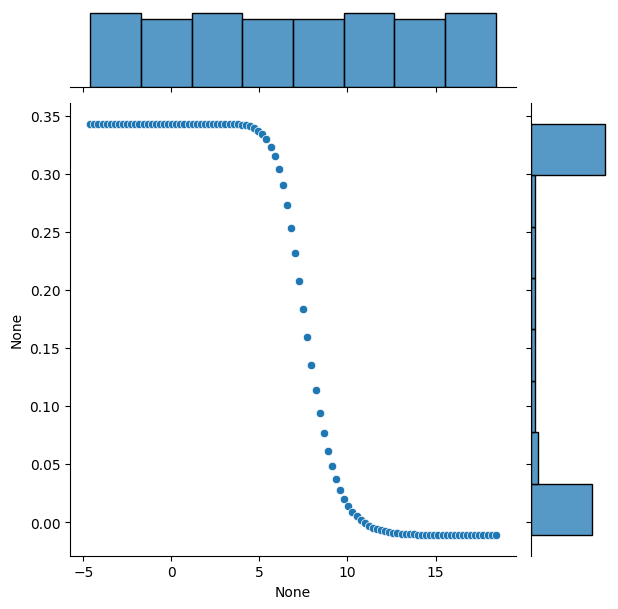

In [141]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [142]:
np.where(test_mean == max(test_mean))

(array([30], dtype=int64),)

In [143]:
param_range[36]

43.28761281083057

In [144]:
lm_lasso_best = Lasso(alpha = param_range[38])

In [145]:
lm_lasso_best.fit(X_train_s,y_train)

Lasso(alpha=68.92612104349695)

In [146]:
y_pred_best = lm_lasso.predict(X_test_s)

In [147]:
r2_score(y_test,y_pred_best)

0.44078052554178726

# Comparing the r2 values of all models

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),

}

# Train and evaluate each model
r2_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores[model_name] = r2_score(y_test, y_pred)

# Print the R^2 scores of every model
print(r2_scores)

{'Linear Regression': 0.4408004262389239, 'Decision Tree': -0.008831829829713866, 'Random Forest': 0.5064472759898526, 'Gradient Boosting': 0.5073190776571365}


In [149]:
import matplotlib.pyplot as plt

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

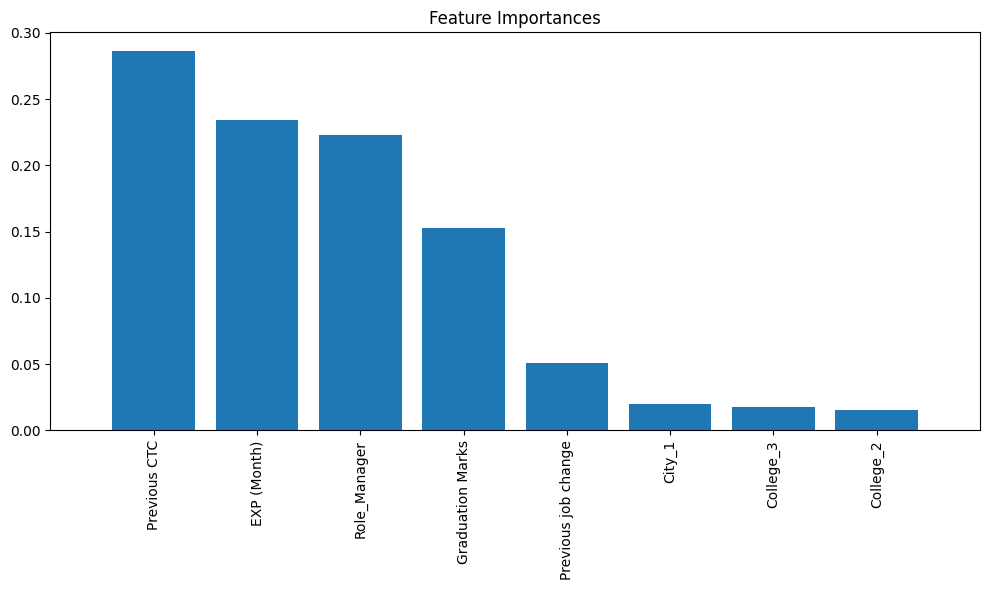

In [150]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Questions : 

### 1 Your views about the problem statement?

 *  The problem statement is about TechWorks Consulting's approach to predicting the salary of the 
 new employees. It deals with objective and data approaches rather than intuitive business decisions. 
 * Predicting employee salaries based on various factors(independent variables) i.e. experience, education, and location.
 * It highlights the importance of fair and competitive compensation, which is crucial for attracting and retaining top talent


### 2 What will be your approach to solving this task?

My approach will be to understand the business scenario and try to find possible solutions to solving this problem.

 #### Data Preprocessing:
    *   Handle missing values by replacing the numerical values with the median or mean of the total
    *   Convert categorical data into numerical data:
    *   Identify Outliers and treat the Outliers.
    *   feature scaling.

####  Model Selection and Training:
    *   Split the data into training and testing sets in the 80:20.
    *   Train multiple regression models examples are follow:
    *   Linear Regression
    *   Decision tree Regressor
    *   Random Forest Regressor
    *   Gradient Boosting Machine Regressor
    *   XGBoost
    *   Ridge Regression
    *   Lasso Regression

####  Evaluating model performance

    * Evaluate the results of the above-mentioned models by Mean Squared Error (MSE) and R-squared Value

 ####  Predictive Analysis:

          * Use the trained model to predict salaries for new employees.
          * Validate the model’s predictions with appropriate statistical methods.  

#### Selecting the best model and optimizing it

    * Use all statistical models and document the best results given by different models.
  

### 3 What were the available ML model options you had to perform this task? 

The available options were:


* Linear Regression
* Decision tree Regressor
* Random Forest Regressor
* Gradient Boosting Machine Regressor
* XGBoost
* Ridge Regression
* Lasso Regressionession


### 4 Which model’s performance is best and what could be the possible reason for that?

 To detect the best model we can check the R-squared value of the models.
 The maximum R square value shows the best fit of the model. So the best Model is Gradient Boosting: 0.5073190776571365 and  Random Forest Regression, having R2_score: 0.6618027689999071

### 5 What steps can you take to improve this selected model’s performance even further?
To improve this selected model’s performance even further the following steps can be taken : 

   * Gathering adequate data -  get a more diverse sample size
   * Implement k-fold cross-validation to ensure the model's robustness and reduce overfitting.
   * Using ensemble methods. 